# Confidence Interval- Coding exercises

#Exercise-1

In [ ]:
import scipy.stats as stats
import numpy as np

n = 50
sample_mean = 4.2
sample_std = 1.1
confidence =0.95

#Standard error
SE = sample_std/np.sqrt(n)

#Critical t-value
alpha = 1-confidence
df = n-1
t_critical = stats.t.ppf(1-alpha/2,n-1)

#Margin of error
ME = t_critical * SE

# Confidence Interval
ci_lower = sample_mean-ME
ci_upper = sample_mean+ME

print("Standard error =", SE)
print("t_critical =", t_critical)
print("Margin of error =", ME)
print("95% CI = (", ci_lower, ",", ci_upper, ")")



Standard error = 0.15556349186104046
t_critical = 2.0095752371292397
Margin of error = 0.31261654104530295
95% CI = ( 3.887383458954697 , 4.512616541045303 )


# Exercise -2

Confidence Interval for Proportion

In [ ]:
n = 400
x = 128
confidence = 0.9

#computing sample proportion
p̂ = x / n

#standard error
SE = np.sqrt(p̂ * (1-p̂)/ n)

# Finding the z critical value
alpha = 1- confidence
z_critical = stats.norm.ppf(1 - alpha/2)

#compute confidence interval
CI_lower = p̂ - z_critical * SE
CI_upper = p̂ + z_critical * SE

print("Standard error =", SE)
print("z_critical =", z_critical)
print("Sample proportion =", p̂)
print(f"{int(confidence*100)}% CI = ({ci_lower:.4f}, {ci_upper:.4f})")


Standard error = 0.0233238075793812
z_critical = 1.6448536269514722
Sample proportion = 0.32
90% CI = (3.8874, 4.5126)


#Exercise -3

Compare Two Means (Independent Samples)

In [ ]:
import math
from math import isfinite
from scipy.stats import t

# Given data
n1, mean1, std1 = 40, 5200, 610
n2, mean2, std2 = 35, 4900, 580
confidence = 0.95

#Computing standard error
se = math.sqrt((std1**2)/n1 + (std2**2)/n2)

#computing degree of freedom
num = ( (std1**2)/n1 + (std2**2)/n2 )**2
den = (( (std1**2)/n1 )**2) / (n1 - 1) + (( (std2**2)/n2 )**2) / (n2 - 1)
df = num / den

#Getting critical t value
try:
    alpha = 1 - confidence
    t_star = t.ppf(1 - alpha/2, df)
except Exception:
    t_star = 1.99

# Step 4: compute confidence interval for the difference (mean1 - mean2)
diff = mean1 - mean2
margin = t_star * se
ci_low, ci_high = diff - margin, diff + margin

print(f"SE = {se:.4f}, df = {df:.2f}, t* = {t_star:.3f}")
print(f"95% CI for (mu1 - mu2): ({ci_low:.2f}, {ci_high:.2f})")





SE = 137.5279, df = 72.48, t* = 1.993
95% CI for (mu1 - mu2): (25.87, 574.13)


# Exercise 4

Visualizing Confidence Intervals

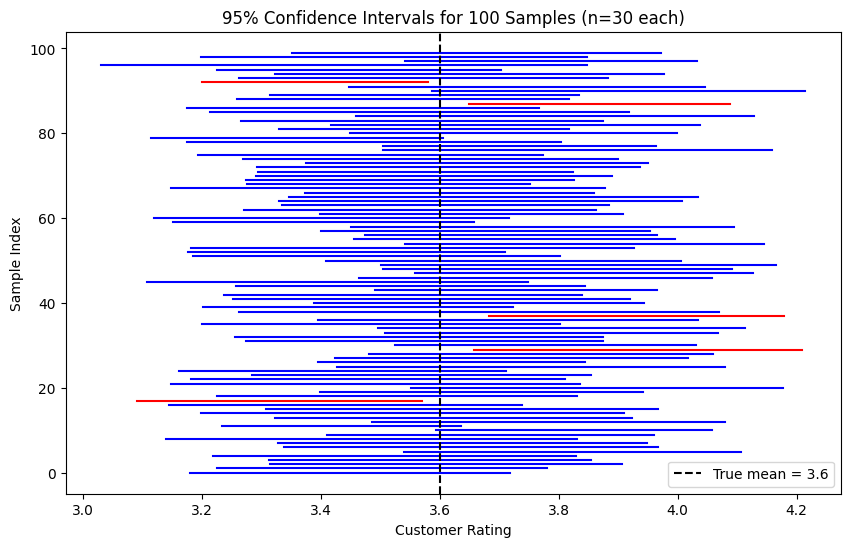

Out of 100, 95 intervals contain the true mean (95.00%)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parameters
np.random.seed(42)  # reproducibility
true_mean, true_std = 3.6, 0.8
n, num_samples = 30, 100
alpha = 0.05

# Step 1: simulate 100 samples
samples = [np.random.normal(true_mean, true_std, n) for _ in range(num_samples)]

# Step 2 & 3: compute CI for each and store bounds
cis = []
df = n - 1
t_star = t.ppf(1 - alpha/2, df)  # critical t value

for sample in samples:
    mean = np.mean(sample)
    se = np.std(sample, ddof=1) / np.sqrt(n)
    margin = t_star * se
    lower, upper = mean - margin, mean + margin
    cis.append((lower, upper))

# Step 4: plot intervals, color based on whether they contain true mean
plt.figure(figsize=(10, 6))
for i, (low, high) in enumerate(cis):
    if low <= true_mean <= high:
        plt.plot([low, high], [i, i], color="blue")
    else:
        plt.plot([low, high], [i, i], color="red")

plt.axvline(true_mean, color="black", linestyle="--", label=f"True mean = {true_mean}")
plt.xlabel("Customer Rating")
plt.ylabel("Sample Index")
plt.title("95% Confidence Intervals for 100 Samples (n=30 each)")
plt.legend()
plt.show()

# Count how many CIs contain the true mean
coverage = sum(1 for low, high in cis if low <= true_mean <= high)
print(f"Out of {num_samples}, {coverage} intervals contain the true mean ({coverage/num_samples:.2%})")


# Service Times– Exponential Distributio

In [ ]:
import numpy as np

# Sample data
data = np.array([5.2, 3.1, 4.7, 6.0, 2.8])
n = len(data)

# Step 1: Compute MLE for lambda (λ = n / sum(data))
lambda_hat = n / np.sum(data)

print(f"Sample size n = {n}")
print(f"Sum of data = {np.sum(data):.2f}")
print(f"MLE for λ = {lambda_hat:.4f}")

# Asymptotic variance: Var(λ_hat) ≈ λ^2 / n
se = lambda_hat / np.sqrt(n)
z = 1.96  # 95% normal approx
ci_lower = lambda_hat - z * se
ci_upper = lambda_hat + z * se

print(f"95% CI for λ ≈ ({ci_lower:.4f}, {ci_upper:.4f})")


Sample size n = 5
Sum of data = 21.80
MLE for λ = 0.2294
95% CI for λ ≈ (0.0283, 0.4304)


# Customer Complaints– Poisson Distribution

Sample size n = 7
Sum of complaints = 15
MLE for λ = 2.1429 complaints/day


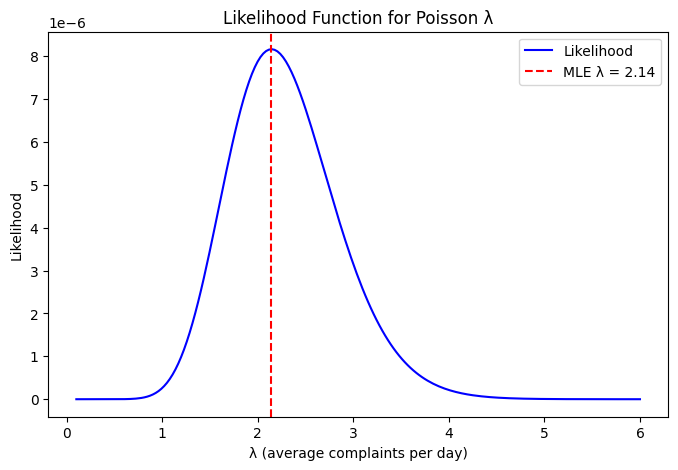

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Data
data = np.array([2, 3, 4, 1, 0, 3, 2])
n = len(data)

# Step 1: MLE for λ (Poisson) = sample mean
lambda_hat = np.mean(data)

print(f"Sample size n = {n}")
print(f"Sum of complaints = {np.sum(data)}")
print(f"MLE for λ = {lambda_hat:.4f} complaints/day")

# Step 2: Plot likelihood function
lambdas = np.linspace(0.1, 6, 200)  # range of λ to explore
likelihoods = [
    np.prod((np.exp(-l) * (l**data)) / np.array([factorial(x) for x in data]))
    for l in lambdas
]

plt.figure(figsize=(8,5))
plt.plot(lambdas, likelihoods, color="blue", label="Likelihood")
plt.axvline(lambda_hat, color="red", linestyle="--", label=f"MLE λ = {lambda_hat:.2f}")
plt.xlabel("λ (average complaints per day)")
plt.ylabel("Likelihood")
plt.title("Likelihood Function for Poisson λ")
plt.legend()
plt.show()


From a business operations standpoint, the estimate of λ ≈ 2.14 complaints/day means:



*  Expected daily workload: About 2 complaints per day
*  Staffing & resource planning: Helps decide how many reps or support resources are needed.
*  Monitoring: Days with more complaints may signal service issues; fewer complaints may indicate efficiency.
*   Planning for variability: Daily complaints typically fluctuate around 2, so operations can prepare accordingly.











# Normal Distribution– Revenue Per Transaction

In [ ]:
import numpy as np

# Sample data: revenue per transaction
data = np.array([220, 250, 245, 230, 265, 240])
n = len(data)

# Step 1: MLE for mean (mu) is the sample mean
mu_hat = np.mean(data)

# Step 2: MLE for variance (sigma^2) is the average squared deviation from the mean
sigma2_hat = np.sum((data - mu_hat)**2) / n
sigma_hat = np.sqrt(sigma2_hat)

# Print results
print(f"Sample size n = {n}")
print(f"Sample mean (MLE for μ) = {mu_hat:.2f} dollars")
print(f"Sample variance (MLE for σ²) = {sigma2_hat:.2f}")
print(f"Sample standard deviation = {sigma_hat:.2f} dollars")

# Business interpretation
print("\nBusiness Interpretation:")
print(f"- On average, each customer spends about ${mu_hat:.2f} per transaction.")
print(f"- Transaction amounts typically vary by ±${sigma_hat:.2f}, indicating moderate variability.")


Sample size n = 6
Sample mean (MLE for μ) = 241.67 dollars
Sample variance (MLE for σ²) = 205.56
Sample standard deviation = 14.34 dollars

Business Interpretation:
- On average, each customer spends about $241.67 per transaction.
- Transaction amounts typically vary by ±$14.34, indicating moderate variability.
